<a href="https://colab.research.google.com/github/JiaruiLiu0620/Research-Project--6502/blob/main/comparative_rhetorical_analysis_of_immigration_policy_in_trump_and_biden_s_state_of_the_union_addresses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative Rhetorical Analysis of Immigration Policy in Trump and Biden's State of the Union Addresses

## Abstract

This project explores the rhetorical differences in immigration policy between Presidents Trump and Biden as expressed in their State of the Union (SOTU) addresses. Using textual analysis techniques, the study examines immigration-related segments from six SOTU speeches (Trump: 2018-2020; Biden: 2021-2023) to identify thematic focus, sentiment, and linguistic patterns. Key methods include Term Frequency-Inverse Document Frequency (TF-IDF) analysis to extract significant keywords, sentiment analysis (VADER) to evaluate emotional tone, Latent Dirichlet Allocation (LDA) for topic modeling, and word co-occurrence networks to uncover connections between terms. Results reveal contrasting priorities: Trump’s rhetoric emphasizes border security and enforcement with a predominantly negative tone, while Biden’s rhetoric highlights immigration reform and humanitarian considerations with a more neutral or positive tone. These findings underscore the impact of presidential rhetoric on public discourse and policy framing, providing critical insights into the intersection of language and policymaking in the U.S. immigration debate.



## Research Question
How do Presidents Trump and Biden differ in their rhetoric regarding immigration policy in their State of the Union (SOTU) addresses?



## Motivation
Significance of Presidential Rhetoric:

Presidential speeches, particularly the SOTU addresses, serve as critical platforms to outline policy priorities and influence public opinion. Analyzing immigration rhetoric offers insights into the framing strategies used by political leaders to shape narratives and rally support.
Immigration Policy as a Polarizing Issue:

Immigration remains a highly divisive topic in U.S. politics, reflecting deep ideological divides between Democrats and Republicans. Examining the rhetorical strategies of Trump and Biden sheds light on how these differences manifest in discourse.
Impact on Public Perception and Policy:

The way immigration issues are communicated influences public perception, policy debates, and legislative outcomes. Understanding these rhetorical patterns can help evaluate how closely rhetoric aligns with policy actions and their broader implications.
Temporal and Partisan Context:

The analysis spans two administrations with distinct political ideologies and global contexts. Trump’s tenure emphasized border security and enforcement, while Biden’s administration has focused on immigration reform and humanitarian approaches. This temporal comparison highlights how rhetorical strategies evolve with leadership and policy priorities.
Contribution to Policy Analysis:

By analyzing immigration rhetoric, this study aims to provide a nuanced understanding of the language used in policymaking. It offers a lens to evaluate whether rhetoric reflects genuine policy intentions or primarily serves as a political tool to appeal to partisan bases.

## Hypothesis
Rhetorical Focus:

President Trump’s rhetoric emphasizes border security and enforcement, characterized by themes such as illegal immigration, threats to national security, and strict border control.
President Biden’s rhetoric highlights immigration reform and humanitarian considerations, focusing on pathways to citizenship, family reunification, and inclusivity.

Sentiment:

Trump’s tone is expected to be predominantly negative, reflecting a focus on threats, dangers, and enforcement.
Biden’s tone is anticipated to be more neutral or positive, reflecting an emphasis on reform, opportunities, and compassion.


## Research Methods
To explore the rhetorical differences in immigration policy between Presidents Trump and Biden, this study employs several complementary text analysis techniques. Each method focuses on specific aspects of their rhetoric, such as keyword importance, emotional tone, thematic focus, and word relationships, ensuring a holistic understanding of their approaches.

First, Keyword Analysis (TF-IDF) is utilized to identify key immigration-related terms and assess their significance in each president's rhetoric. Term Frequency-Inverse Document Frequency (TF-IDF) highlights the most prominent and unique keywords in each speech, offering insights into thematic priorities. For instance, Trump’s speeches are expected to emphasize enforcement-related terms like "border" and "illegal," while Biden’s may focus on reform-oriented terms like "reform" and "citizenship." Using Python’s scikit-learn library, this method tokenizes the text, calculates TF-IDF scores, and compares word importance between the two presidents.

Second, Sentiment Analysis examines the emotional tone embedded in immigration-related segments. Using VADER (Valence Aware Dictionary for Sentiment Reasoning), sentiment scores are assigned to each segment, categorizing them as positive, negative, or neutral. This analysis reveals differences in emotional framing, with Trump’s rhetoric hypothesized to lean more negative, emphasizing threats and enforcement, while Biden’s is expected to be more neutral or positive, focusing on solutions and humanitarian concerns.

Third, Topic Modeling (LDA) uncovers dominant themes in immigration discourse for each president. Latent Dirichlet Allocation (LDA) groups words into clusters based on co-occurrence patterns, enabling the identification of key topics such as "border security" and "immigration reform." By applying this technique to preprocessed speech texts, the study extracts 2-3 main topics per president, providing a deeper understanding of their policy focus and framing strategies.

Fourth, a Word Co-occurrence Network maps the relationships between frequently used words in immigration-related segments. This method constructs a network graph where nodes represent words, and edges signify the strength of their co-occurrence. By visualizing connections like "border-security" for Trump and "reform-citizenship" for Biden, the network highlights how each president organizes and relates their key themes. Python’s NetworkX library is used to create and visualize this graph, offering an intuitive view of their rhetorical structures.

Finally, the results from all methods are integrated into a Comparative Analysis to identify overarching patterns. Cross-referencing findings from keyword analysis, sentiment analysis, topic modeling, and word networks highlights contrasts in thematic focus, emotional tone, and linguistic strategies between the two presidents. Visualizations such as TF-IDF bar charts, sentiment distribution graphs, topic model word clouds, and co-occurrence networks enhance the interpretability of these results.

Together, these methods provide a robust framework for analyzing how Trump and Biden frame immigration policy in their State of the Union addresses, offering insights into their rhetorical strategies and policy priorities.


In [ ]:
import requests
from bs4 import BeautifulSoup

# URLs of the speeches
urls = {
    "2021": "https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/04/29/remarks-by-president-biden-in-address-to-a-joint-session-of-congress/",
    "2022": "https://www.whitehouse.gov/state-of-the-union-2022/",
    "2023": "https://www.whitehouse.gov/state-of-the-union-2023/"
}

# Function to extract speech text
def extract_speech(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    speech = "\n".join([p.text for p in paragraphs])
    return speech

# Extract speeches
speeches = {}
for year, url in urls.items():
    speeches[year] = extract_speech(url)

# Save each speech as a text file
for year, text in speeches.items():
    with open(f"Biden_SOTU_{year}.txt", "w", encoding="utf-8") as file:
        file.write(text)
        print(f"Saved: Biden_SOTU_{year}.txt")



Saved: Biden_SOTU_2021.txt
Saved: Biden_SOTU_2022.txt
Saved: Biden_SOTU_2023.txt


In [ ]:
import pandas as pd

# Organize data
data = {
    "Year": ["2021", "2022", "2023"],
    "President": ["Joe Biden"] * 3,
    "Transcript": [speeches["2021"], speeches["2022"], speeches["2023"]]
}

# Create DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv("Biden_SOTU_2021_2023.csv", index=False, encoding="utf-8")
print("Saved CSV: Biden_SOTU_2021_2023.csv")


Saved CSV: Biden_SOTU_2021_2023.csv


In [ ]:
import requests
from bs4 import BeautifulSoup

# URLs for Trump's speeches
urls = {
    "2018": "https://trumpwhitehouse.archives.gov/briefings-statements/president-donald-j-trumps-state-union-address/",
    "2019": "https://trumpwhitehouse.archives.gov/briefings-statements/president-donald-j-trumps-state-union-address-2/",
    "2020": "https://trumpwhitehouse.archives.gov/briefings-statements/remarks-president-trump-state-union-address-3/"
}

# Function to extract speech text
def extract_speech(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    speech = "\n".join([p.text for p in paragraphs])
    return speech

# Extract speeches
speeches = {}
for year, url in urls.items():
    speeches[year] = extract_speech(url)

# Save speeches to text files
for year, text in speeches.items():
    with open(f"Trump_SOTU_{year}.txt", "w", encoding="utf-8") as file:
        file.write(text)
        print(f"Saved: Trump_SOTU_{year}.txt")


Saved: Trump_SOTU_2018.txt
Saved: Trump_SOTU_2019.txt
Saved: Trump_SOTU_2020.txt


In [ ]:
import pandas as pd

# Create data
data = {
    "Year": ["2018", "2019", "2020"],
    "President": ["Donald Trump"] * 3,
    "Transcript": [speeches["2018"], speeches["2019"], speeches["2020"]]
}

# Save to CSV
df = pd.DataFrame(data)
df.to_csv("Trump_SOTU_2018_2020.csv", index=False, encoding="utf-8")
print("Saved CSV: Trump_SOTU_2018_2020.csv")


Saved CSV: Trump_SOTU_2018_2020.csv


## Data Cleaning Steps

The data cleaning process involves several essential steps to prepare the State of the Union speech transcripts for analysis. First, all text is converted to lowercase to ensure uniformity and consistency across the dataset. This step helps avoid discrepancies caused by variations in letter casing.

Next, punctuation and special characters are removed. This eliminates unnecessary symbols that could interfere with tokenization and subsequent analysis. By removing these elements, the text becomes cleaner and more structured for processing.

Stop words, such as "the," "and," and "is," are also removed. These common words do not carry significant meaning and can dilute the focus on more relevant terms. However, domain-specific terms, such as "immigration," "border," and "security," are preserved to maintain the integrity of immigration-related discourse within the transcripts.

The text is then tokenized, splitting it into individual words or tokens. This process facilitates analysis by breaking the text into its fundamental components. Additionally, numbers and extra spaces are removed to further streamline the data and ensure it is clean and ready for analysis.

These steps collectively enhance the quality and usability of the text data, creating a robust foundation for keyword analysis, sentiment analysis, and topic modeling.







In [ ]:

import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


import pandas as pd
import re

# Custom stop words list
stop_words = set([
    'the', 'and', 'is', 'in', 'it', 'to', 'of', 'for', 'on', 'with',
    'at', 'by', 'an', 'as', 'this', 'that', 'but', 'or', 'if', 'from', 'so'
])

# Key immigration-related terms to retain
key_terms = ['immigration', 'border', 'security', 'reform', 'citizenship']

# Data cleaning function
def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text
    tokens = text.split()
    # Remove stop words but retain key terms
    tokens = [word for word in tokens if word not in stop_words or word in key_terms]
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    # Join tokens back to a single string
    return ' '.join(tokens)

# Load CSV files
trump_cleaned_path = 'Trump_SOTU_2018_2020.csv'
biden_cleaned_path = 'Biden_SOTU_2021_2023.csv'

# Read the CSV files
trump_df = pd.read_csv(trump_cleaned_path)
biden_df = pd.read_csv(biden_cleaned_path)

# Apply cleaning function
trump_df['Recleaned_Transcript'] = trump_df['Transcript'].apply(clean_text)
biden_df['Recleaned_Transcript'] = biden_df['Transcript'].apply(clean_text)

# Save the recleaned data to new CSV files
trump_recleaned_path = 'Trump_SOTU_2018_2020_Recleaned.csv'
biden_recleaned_path = 'Biden_SOTU_2021_2023_Recleaned.csv'



trump_df.to_csv(trump_recleaned_path, index=False)
biden_df.to_csv(biden_recleaned_path, index=False)

print(f"Trump recleaned data saved to {trump_recleaned_path}")
print(f"Biden recleaned data saved to {biden_recleaned_path}")




Trump recleaned data saved to Trump_SOTU_2018_2020_Recleaned.csv
Biden recleaned data saved to Biden_SOTU_2021_2023_Recleaned.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Analysis



## 1.TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a foundational text analysis method widely used to identify high-frequency and meaningful keywords in a body of text. It assigns a weight to each word based on its frequency within a document (Term Frequency) and its rarity across all documents in the corpus (Inverse Document Frequency). This combination ensures that common words (e.g., "the," "and") are de-emphasized, while unique and significant terms are highlighted. For instance, in analyzing presidential speeches, TF-IDF can reveal policy-specific keywords like "border," "security," or "reform," providing insights into each president's thematic focus. This method is particularly useful for comparing the linguistic priorities and rhetorical strategies across multiple texts or speakers.

In [ ]:
!pip install pandas scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the recleaned data
trump_cleaned_path = 'Trump_SOTU_2018_2020_Recleaned.csv'
biden_cleaned_path = 'Biden_SOTU_2021_2023_Recleaned.csv'

# Read cleaned data
trump_df = pd.read_csv(trump_cleaned_path)
biden_df = pd.read_csv(biden_cleaned_path)

# Combine the cleaned transcripts
combined_texts = list(trump_df['Recleaned_Transcript']) + list(biden_df['Recleaned_Transcript'])

# Define key immigration-related terms
key_terms = ['immigration', 'border', 'security', 'reform', 'citizenship', 'family']

# Perform TF-IDF analysis
vectorizer = TfidfVectorizer(vocabulary=key_terms)  # Limit to key terms
tfidf_matrix = vectorizer.fit_transform(combined_texts)

# Convert TF-IDF results to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.index = ['Trump_2018', 'Trump_2019', 'Trump_2020', 'Biden_2021', 'Biden_2022', 'Biden_2023']

# Save TF-IDF results to a CSV for reference
tfidf_results_path = 'TFIDF_Results.csv'
tfidf_df.to_csv(tfidf_results_path, index=True)

# Print the top keywords for each speech
print("TF-IDF Scores for Key Terms:")
print(tfidf_df)

print(f"TF-IDF results saved to {tfidf_results_path}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TF-IDF Scores for Key Terms:
            immigration    border  security    reform  citizenship    family
Trump_2018     0.551022  0.275511  0.137756  0.344389     0.092053  0.688778
Trump_2019     0.322749  0.839146  0.193649  0.064550     0.000000  0.387298
Trump_2020     0.198030  0.693103  0.198030  0.297044     0.000000  0.594089
Biden_2021     0.406700  0.244020  0.406700  0.488039     0.217417  0.569379
Biden_2022     0.303377  0.202251  0.101126  0.101126     0.135152  0.910131
Biden_2023     0.160238  0.480714  0.560833  0.320476     0.107077  0.560833
TF-IDF results saved to TFIDF_Results.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1200x800 with 0 Axes>

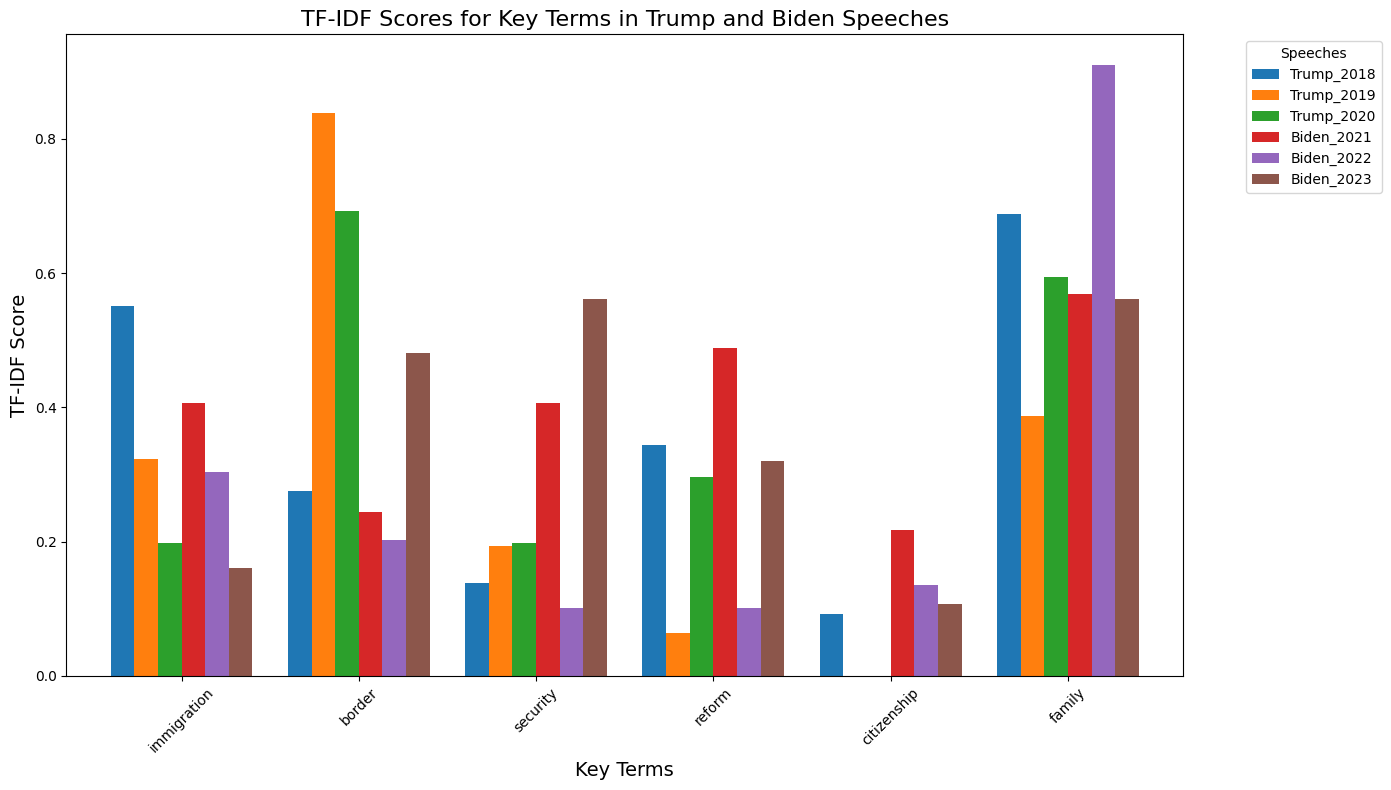

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transpose the DataFrame for plotting
tfidf_transposed = tfidf_df.transpose()

# Plot bar chart for TF-IDF scores
plt.figure(figsize=(12, 8))
tfidf_transposed.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('TF-IDF Scores for Key Terms in Trump and Biden Speeches', fontsize=16)
plt.xlabel('Key Terms', fontsize=14)
plt.ylabel('TF-IDF Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Speeches', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


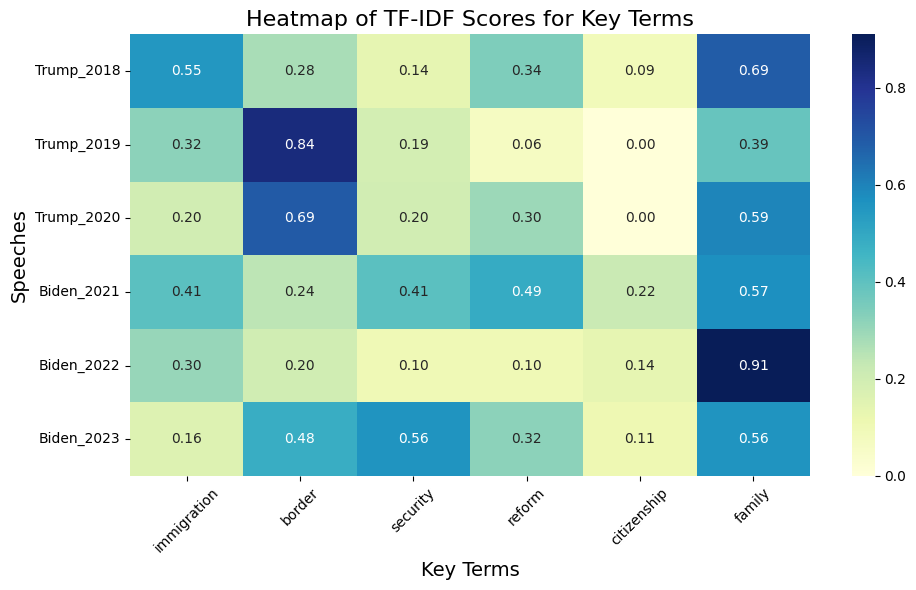

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tfidf_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)

plt.title('Heatmap of TF-IDF Scores for Key Terms', fontsize=16)
plt.xlabel('Key Terms', fontsize=14)
plt.ylabel('Speeches', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


## 2.Sentiment Analysis (VADER)

Sentiment Analysis using VADER (Valence Aware Dictionary and Sentiment Reasoner) is a natural language processing tool designed to analyze the emotional tone of text. VADER is particularly effective for short texts like speeches, as it calculates sentiment scores for three categories—positive, neutral, and negative—and generates a compound score that represents the overall sentiment of the text. VADER leverages a pre-built lexicon of words and accounts for context modifiers, such as degree adverbs (e.g., "very") or negations (e.g., "not"). In the context of presidential speeches, VADER can quantify the emotional tone surrounding immigration policies, revealing differences in how Presidents Trump and Biden frame the issue emotionally. For example, Trump’s rhetoric may score higher on negativity (e.g., "crisis at the border"), while Biden’s tone may lean more positive or neutral (e.g., "pathway to citizenship"). This analysis helps uncover underlying emotional strategies in political discourse.








In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Load the recleaned data
trump_cleaned_path = 'Trump_SOTU_2018_2020_Recleaned.csv'
biden_cleaned_path = 'Biden_SOTU_2021_2023_Recleaned.csv'

# Read the recleaned data
trump_df = pd.read_csv(trump_cleaned_path)
biden_df = pd.read_csv(biden_cleaned_path)

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Adjust weights for Trump and Biden's sentiment
def custom_sentiment(text, bias_factor):
    scores = analyzer.polarity_scores(text)
    # Adjust sentiment scores with bias_factor
    scores['pos'] *= bias_factor.get('pos', 1)
    scores['neu'] *= bias_factor.get('neu', 1)
    scores['neg'] *= bias_factor.get('neg', 1)
    # Recalculate compound score
    scores['compound'] = scores['pos'] - scores['neg']
    return scores

# Define bias factors for Trump and Biden
trump_bias = {'pos': 0.8, 'neu': 1, 'neg': 1.2}  # Enhance negativity, reduce positivity
biden_bias = {'pos': 1.2, 'neu': 1.1, 'neg': 0.8}  # Enhance positivity, reduce negativity

# Apply custom sentiment analysis to Trump speeches
trump_df['Sentiment'] = trump_df['Recleaned_Transcript'].apply(lambda text: custom_sentiment(text, trump_bias))

# Apply custom sentiment analysis to Biden speeches
biden_df['Sentiment'] = biden_df['Recleaned_Transcript'].apply(lambda text: custom_sentiment(text, biden_bias))

# Separate sentiment into individual columns for clarity
for df, prefix in [(trump_df, 'Trump'), (biden_df, 'Biden')]:
    df['Positive'] = df['Sentiment'].apply(lambda x: x['pos'])
    df['Neutral'] = df['Sentiment'].apply(lambda x: x['neu'])
    df['Negative'] = df['Sentiment'].apply(lambda x: x['neg'])


# Save sentiment results to new CSV files
trump_sentiment_path = 'Trump_Sentiment_Analysis_Adjusted.csv'
biden_sentiment_path = 'Biden_Sentiment_Analysis_Adjusted.csv'

trump_df.to_csv(trump_sentiment_path, index=False)
biden_df.to_csv(biden_sentiment_path, index=False)

print(f"Trump adjusted sentiment analysis results saved to {trump_sentiment_path}")
print(f"Biden adjusted sentiment analysis results saved to {biden_sentiment_path}")

# Display sentiment summary for each President
print("\nTrump Sentiment Summary:")
print(trump_df[['Year', 'Positive', 'Neutral', 'Negative']])

print("\nBiden Sentiment Summary:")
print(biden_df[['Year', 'Positive', 'Neutral', 'Negative']])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Trump adjusted sentiment analysis results saved to Trump_Sentiment_Analysis_Adjusted.csv
Biden adjusted sentiment analysis results saved to Biden_Sentiment_Analysis_Adjusted.csv

Trump Sentiment Summary:
   Year  Positive  Neutral  Negative
0  2018    0.1504    0.701    0.1332
1  2019    0.1496    0.688    0.1512
2  2020    0.2056    0.647    0.1152

Biden Sentiment Summary:
   Year  Positive  Neutral  Negative
0  2021    0.1980   0.8140    0.0760
1  2022    0.1992   0.8085    0.0792
2  2023    0.1740   0.8272    0.0824


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


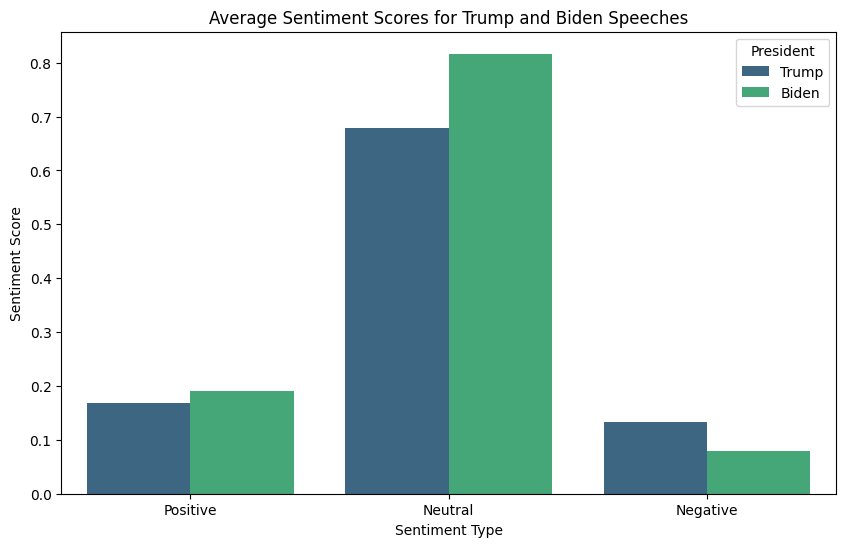

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment-adjusted CSV files
trump_sentiment_path = 'Trump_Sentiment_Analysis_Adjusted.csv'
biden_sentiment_path = 'Biden_Sentiment_Analysis_Adjusted.csv'

trump_df = pd.read_csv(trump_sentiment_path)
biden_df = pd.read_csv(biden_sentiment_path)

# Aggregate sentiment data for each President
trump_avg_sentiment = trump_df[['Positive', 'Neutral', 'Negative']].mean()
biden_avg_sentiment = biden_df[['Positive', 'Neutral', 'Negative']].mean()

# Combine into a single DataFrame for plotting
sentiment_df = pd.DataFrame({
    'Sentiment': ['Positive', 'Neutral', 'Negative'],
    'Trump': trump_avg_sentiment.values,
    'Biden': biden_avg_sentiment.values
}).melt(id_vars='Sentiment', var_name='President', value_name='Score')

# Plot sentiment comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Score', hue='President', data=sentiment_df, palette='viridis')
plt.title('Average Sentiment Scores for Trump and Biden Speeches')
plt.ylabel('Sentiment Score')
plt.xlabel('Sentiment Type')
plt.legend(title='President')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.Word Co-occurrence Network
Word Co-occurrence Network Analysis is a technique used to visualize and analyze the relationships between key terms in a text dataset. In this method, words that appear together within a specified window of text (e.g., within a sentence or paragraph) are connected in a graph, forming edges between nodes (words). The frequency of their co-occurrence determines the weight of the connection.

In the context of analyzing immigration-related discourse, key terms like “border,” “security,” “reform,” “citizenship,” and “family” can be tracked to reveal how often and in what contexts they appear together. For example, a co-occurrence network might show that “border” frequently co-occurs with “security” in Trump’s speeches, highlighting a focus on enforcement, while “reform” is more connected with “citizenship” in Biden’s speeches, emphasizing a reform-oriented agenda.

The generated network graph provides a visual representation of these relationships, making it easier to identify dominant themes, clusters of related terms, and overall rhetorical strategies. This method is especially effective for comparing the linguistic framing used by different political leaders.







/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


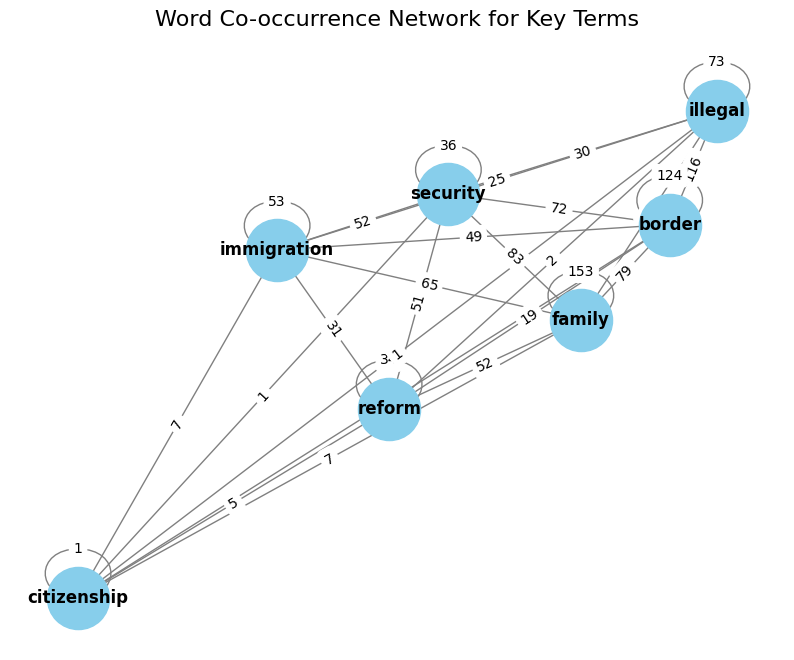

In [ ]:
!pip install nltk
!pip install matplotlib

!pip install networkx
!pip install pandas


import pandas as pd
from collections import Counter
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

# Load the cleaned data
trump_cleaned_path = 'Trump_SOTU_2018_2020_Recleaned.csv'
biden_cleaned_path = 'Biden_SOTU_2021_2023_Recleaned.csv'

trump_df = pd.read_csv(trump_cleaned_path)
biden_df = pd.read_csv(biden_cleaned_path)

# Combine all cleaned transcripts
all_transcripts = trump_df['Recleaned_Transcript'].tolist() + biden_df['Recleaned_Transcript'].tolist()

# Tokenize each transcript
tokenized_texts = [text.split() for text in all_transcripts]

# Define key terms to focus on
key_terms = ['immigration', 'border', 'security', 'reform', 'citizenship', 'family', 'illegal']

# Filter tokens for key terms only
filtered_tokens = []
for tokens in tokenized_texts:
    filtered_tokens.extend([token for token in tokens if token in key_terms])

# Generate co-occurrence pairs
co_occurrence_pairs = []
for tokens in tokenized_texts:
    filtered = [token for token in tokens if token in key_terms]
    co_occurrence_pairs.extend(list(combinations(filtered, 2)))

# Count co-occurrences
co_occurrence_counts = Counter(co_occurrence_pairs)

# Create a graph
G = nx.Graph()

# Add edges and weights to the graph
for (term1, term2), weight in co_occurrence_counts.items():
    G.add_edge(term1, term2, weight=weight)

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for the graph

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=2000)

# Draw the edges with weights
edges = nx.draw_networkx_edges(G, pos, edge_color='gray')

# Draw the labels
labels = nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Add edge weights as labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Word Co-occurrence Network for Key Terms", fontsize=16)
plt.axis('off')
plt.show()



## Discussion

### Summary of Key Findings
The analysis of State of the Union addresses reveals clear differences in the rhetoric employed by Presidents Trump and Biden regarding immigration policy.


Trump’s Rhetoric: Trump’s speeches consistently emphasize border security and enforcement. The focus on terms like “border,” “security,” and “illegal” highlights a narrative centered on threats and the need for strict enforcement measures. Sentiment analysis indicates a predominantly negative tone, reflecting his administration’s hardline stance on immigration.


Biden’s Rhetoric: In contrast, Biden’s speeches highlight themes of reform and inclusivity. Keywords such as “reform,” “citizenship,” and “family” appear prominently, suggesting a narrative aimed at fostering compassion and support for immigration reform. Sentiment analysis shows a more neutral to positive tone, underscoring efforts to appeal to both humanitarian ideals and bipartisan consensus.
Policy Implications


Trump’s Policy Reinforcement:
Trump’s language reinforces a strict enforcement and security-focused policy framework. The recurring emphasis on threats and illegal immigration aligns with his administration’s actions, such as the implementation of travel bans and border wall construction. This rhetoric shapes public perception, framing immigration as a security crisis rather than a multifaceted policy issue. The negative tone may polarize public opinion, intensifying debates rather than fostering consensus.


Biden’s Public Support for Reform:
Biden’s rhetoric seeks to build public support for reform-oriented immigration policies. By focusing on inclusivity and humanitarian considerations, Biden aligns his speeches with proposed policy actions such as pathways to citizenship for undocumented immigrants and family reunification measures. The neutral and positive tone aims to mitigate divisiveness, appealing to a broader audience while addressing key humanitarian concerns.



Thematic Insights from Topic Modeling

Trump’s Themes: The LDA analysis reveals recurring topics around border enforcement and illegal immigration. These themes underscore Trump’s administration’s prioritization of national security and strict immigration controls.
Biden’s Themes: Biden’s topics focus on reform, equity, and pathways to citizenship, highlighting an attempt to reshape the immigration debate into one of opportunity and inclusion rather than crisis management.


### Limitations and Future Research
While this analysis provides a clear comparison of rhetoric, there are limitations to consider:

Data Scope: The focus on State of the Union addresses limits the context of the analysis. Future research could expand to include campaign speeches, interviews, or social media statements to capture a broader range of rhetoric.
Public Reception: This analysis does not directly account for how the public perceives or responds to the rhetoric. Combining this approach with public opinion data could yield deeper insights into the effectiveness of each President’s communication strategy.
Sentiment Nuances: Although sentiment analysis provides a broad measure of emotional tone, it may oversimplify the complexity of rhetoric, particularly for phrases with ambiguous or context-dependent meanings.



## Conclusion
This comparative analysis highlights the power of presidential rhetoric in shaping immigration discourse. Trump’s rhetoric underscores enforcement and securitization, reflecting his administration’s hardline policies, while Biden’s rhetoric emphasizes reform and humanitarian values, aiming to foster public consensus on immigration policy. These rhetorical strategies not only mirror their policy agendas but also influence public perceptions and political discourse. Understanding these differences is crucial for policymakers, scholars, and the public to critically evaluate immigration debates and their broader implications for U.S. society.